## Concept

Machine learning is also about learning a function.

In this chapter, we study classifiers

Both domain and range has to be numerical
* domain = features
* range = class labels

2 approaches:
* Supervised Learning
    * Example: Support Vector Machine (SVM)
    * Used when we know the past data
* Unsupervised Learning
    * Example: K-Means

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Preparation for data

In [3]:
x = np.array([[-3,2], [-6, 5], [3,-4], [2,-8]])
y = np.array([1, 1, 2, 2])

When plotting the data, separate x-coordinates and y-coordinates

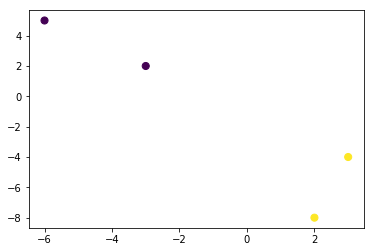

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50) 
# [: , 0] means all rows from the 1st column (x-coordinates)
# [: , 1] means all rows from the 2nd column (y-coordinates)
# c=y means select colour based on categories in y

## Support vector machine (SVM)

In [5]:
from sklearn.svm import SVC

Declare an empty variable with data type SVC.

In [6]:
clf = SVC()

Train the machine.

In [7]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Perform prediction with the trained machine.

Note that both input and output of predict() must be a list.

In [8]:
clf.predict([[-3,2]])

array([1])

In [9]:
clf.predict(x)

array([1, 1, 2, 2])

In [10]:
clf.predict([[2.5, 3]])

array([1])

Visualisation with meshgrid

In [11]:
#Generate meshgrid
X, Y = np.meshgrid(np.linspace(-6,3,30), np.linspace(-8,5,30))

In [12]:
#flatten to become 1-D array
X = X.ravel()
Y = Y.ravel()

In [13]:
Z = clf.predict(list(zip(X, Y)))

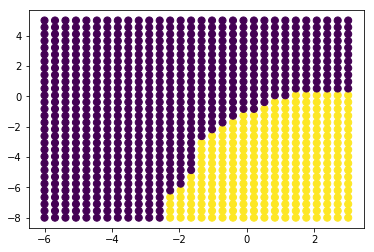

In [14]:
plt.scatter(X, Y, c=Z, s=50)

## Example: classifying iris

In [15]:
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()

In [17]:
# extract lengths and widths of pedal (see description of dataset)
X = iris.data
X= X[:,2:]

In [18]:
# data label
Y = iris.target

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

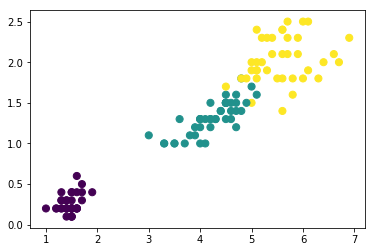

In [21]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=50)

In [22]:
from sklearn.svm import SVC

In [23]:
clf = SVC()

In [24]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
y_predict = clf.predict(x_test)

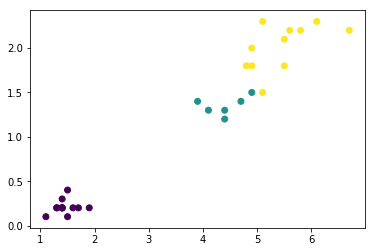

In [26]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict)
# plotting lengths of pedal against widths of pedal

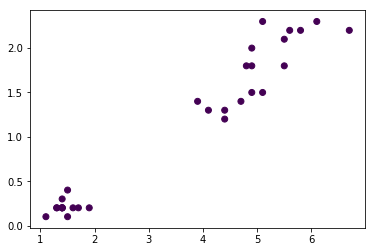

In [27]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict - y_test)
# (y_predict - y_test) for all dots should become 0 if the prediction matches

Visualisation

In [28]:
xx, yy = np.meshgrid(np.arange(0,7,0.02), np.arange(0,3,0.02))

In [29]:
#alternative of zip
np.c_[xx, yy]

array([[0.  , 0.02, 0.04, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.02, 0.04, ..., 0.02, 0.02, 0.02],
       [0.  , 0.02, 0.04, ..., 0.04, 0.04, 0.04],
       ...,
       [0.  , 0.02, 0.04, ..., 2.94, 2.94, 2.94],
       [0.  , 0.02, 0.04, ..., 2.96, 2.96, 2.96],
       [0.  , 0.02, 0.04, ..., 2.98, 2.98, 2.98]])

In [30]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [33]:
z = z.reshape(xx.shape)

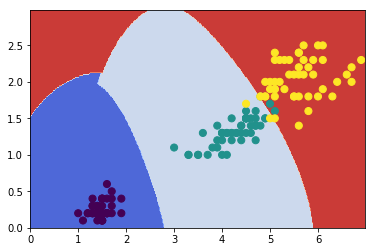

In [34]:
plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm) #colour map as cool and warm
plt.scatter(X[:,0], X[:,1], c=Y, s=50)

## K-means

In [56]:
X = np.random.rand(100,2)

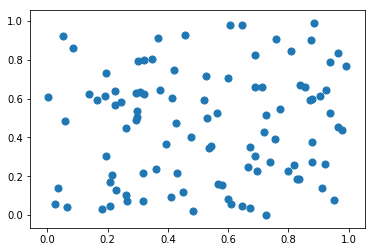

In [57]:
plt.scatter(X[:,0], X[:, 1], s=50)

In [58]:
from sklearn.cluster import KMeans

In [59]:
clf = KMeans(n_clusters=3)     #n_clusters = number of groups

In [60]:
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
clf.labels_

array([2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2,
       1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2], dtype=int32)

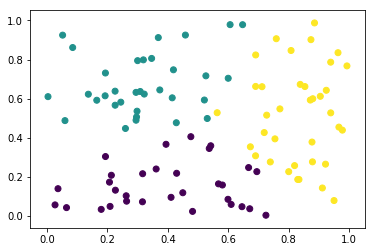

In [63]:
plt.scatter(X[:,0], X[:,1], c=clf.labels_)